In [2]:
import also

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [65]:
points = [
    (0, 0),
    (1, 1.01),
    (2.02, 1.99),
    (3.01, 3.02),
    (4, 4),
    (5, 5),
    (7.5, 8.9),
    (10, 10),
    (14, 14),
    (16, 16),
    (17, 17),
    (18, 18),
    (19, 19),
    (20, 20),
    (22, 22),
    (24, 10),
    (26, 26),
    (28, 28),
    (32, 32),
    (35, 35),
    (39, 39),
    (40, 40),
    (46, 46),
    (50, 50),
    (52, 49),
    (55, 55),
    (60, 72),
    (65, 65),
    (70, 70),
    (75, 80),
    (80, 81),
    (85, 85),
    (87, 88),
    (90, 90),
    (92, 92),
    (95, 95),
    (98, 98),
    (100, 100),
]

print('We have %s points' % len(points))

We have 38 points


In [66]:
X = scale(np.array(points), with_mean=True)

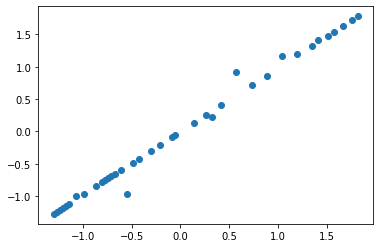

In [67]:
# plot scaled features
plt.plot(X[:,0], X[:,1], 'o')
plt.show()

In [68]:
# run ALSO using Linear Regressor and 3 folds
m = LinearRegression()
scores = also.fit(m, X, n_folds=3)

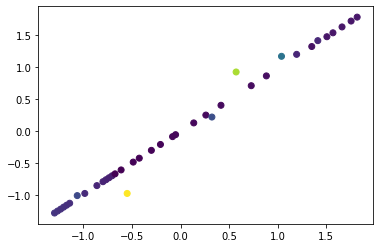

In [71]:
# plot points colorized with outlier scores
plt.scatter(x=X[:,0], y=X[:,1], c=scores)
plt.show()

In [72]:
# sort the points by outlier score and look at the top five
sorted_points = sorted(zip(points, scores), key=lambda x: x[1], reverse=True)
sorted_points[:5]

[((24, 10), 0.4463845981458128),
 ((60, 72), 0.3919720908303756),
 ((75, 80), 0.1800418765266062),
 ((52, 49), 0.11964086667493753),
 ((7.5, 8.9), 0.11262004017556577)]

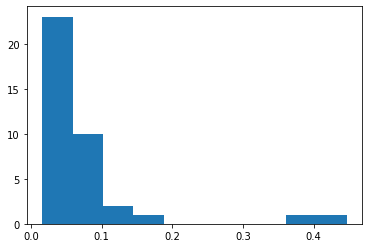

In [73]:
# histogram of outlier scores
hist = plt.hist(scores)

In [74]:
# compute mean, std dev, and two sigma for outlier scores
mu = np.mean(scores)
s = np.std(scores)
two_sig = (scores.mean() - 2 * scores.std(), scores.mean() + 2 * scores.std())

print('mean:      ', mu)
print('std dev:   ', s)
print('two sigma: ', two_sig)

mean:       0.07237394665597062
std dev:    0.08836427253457635
two sigma:  (-0.10435459841318208, 0.24910249172512333)


In [75]:
# find all scores beyond two sigma bound
for point, score in sorted_points:
    if score > two_sig[1]:
        print('%s %s' % (point, score))

(24, 10) 0.4463845981458128
(60, 72) 0.3919720908303756
